In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import geopandas as gpd


In [2]:

def create_summary_stats():
    df_customer = pd.read_csv("../data/customers.csv")
    gender_counts = df_customer.groupby(["PLZ", "Geschlecht"]).size().unstack(fill_value=0)
    # Altersstatistik pro PLZ
    age_stats = df_customer.groupby("PLZ")["Alter"].agg(['count', 'mean'])
    # Beide Tabellen zusammenführen
    plz_summary = gender_counts.join(age_stats)
    return(plz_summary)


def prepare_customer_plz_map(df_customer):

    df_plz =  pd.read_csv("../data/plz_coords.csv")
    df_plz_unique = df_plz.drop_duplicates(subset="plz")
    gdf = gpd.read_file("berlin_plz_shapefile/plz.shp")
    gdf['plz'] = gdf['plz'].astype(int)


    df = pd.merge(df_customer, df_plz_unique.loc[:,["name", "plz","lat", "lon"]], left_on="PLZ", right_on="plz", how="left")

    gdf_merged = gdf.merge(df, left_on='plz', right_on='plz', how='left')
    gdf_plot = gdf_merged[gdf_merged['count'].notna()]
    gdf_plot['count'] = gdf_plot['count'].astype(float)
    gdf_plot = gdf_plot.to_crs(epsg=4326)
    return(gdf_plot)


def plot_customer_density_map(gdf):
    # Choroplethenkarte mit Mapbox
    fig = px.choropleth_mapbox(
        gdf,
        geojson=gdf.geometry,
        locations=gdf.index,  # eindeutiger Index für jedes Feature
        color="count",               # Anzahl der Besucher
        hover_name="name",
        hover_data=["plz","count","mean"],
        color_continuous_scale="Viridis",
        mapbox_style="carto-positron",
        zoom=9,
        center={"lat":52.52, "lon":13.405},
    )
    
    fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
    fig.show()
    return(fig)    

In [4]:
df = create_summary_stats()
gdf = prepare_customer_plz_map(df)
fig = plot_customer_density_map(gdf)

KeyError: 'PLZ'

In [12]:
import requests
import zipfile
import io

# URL zum Shapefile (Beispiel: Berlin PLZ)
url = "https://tsb-opendata.s3.eu-central-1.amazonaws.com/plz/plz.shp.zip"

# Datei herunterladen
response = requests.get(url)
response.raise_for_status()

# ZIP entpacken
with zipfile.ZipFile(io.BytesIO(response.content)) as z:
    z.extractall()  # entpackt in das aktuelle Verzeichnis


In [136]:
n=1000

In [140]:
pd.DataFrame({
        "customer_id": range(1, (n+1))})

customer_id
0              1
1              2
2              3
3              4
4              5
..           ...
995          996
996          997
997          998
998          999
999         1000

[1000 rows x 1 columns]

In [361]:
country_dic = {
    "USA": [
        ("New York", "10001"),
        ("Los Angeles", "90001"),
        ("Chicago", "60601"),
        ("Houston", "77001"),
        ("San Francisco", "94102")
    ],
    "Canada": [
        ("Toronto", "M5H 2N2"),
        ("Vancouver", "V6B 1A1"),
        ("Montreal", "H3B 2Y5"),
        ("Calgary", "T2P 1J9"),
        ("Ottawa", "K1A 0B1")
    ],
    "United Kingdom": [
        ("London", "SW1A 1AA"),
        ("Manchester", "M1 1AE"),
        ("Edinburgh", "EH1 1BB"),
        ("Birmingham", "B1 1TB"),
        ("Bristol", "BS1 4ST")
    ],
    "France": [
        ("Paris", "75001"),
        ("Lyon", "69001"),
        ("Marseille", "13001"),
        ("Strasbourg", "67000"),
        ("Nice", "06000")
    ],
    "Deutschland": [
    ("Munich", "80331"),
    ("Hamburg", "20095"),
    ("Cologne", "50667"),
    ("Frankfurt am Main", "60311"),
    ("Stuttgart", "70173"),
    ("Düsseldorf", "40213"),
    ("Dortmund", "44135"),
    ("Essen", "45127"),
    ("Leipzig", "04109"),
    ("Bremen", "28195"),
    ("Dresden", "01067"),
    ("Hanover", "30159"),
    ("Nuremberg", "90402"),
    ("Duisburg", "47051"),
    ("Bochum", "44787"),
    ("Wuppertal", "42103"),
    ("Bielefeld", "33602"),
    ("Bonn", "53111"),
    ("Münster", "48143"),
    ("Karlsruhe", "76133"),
    ("Mannheim", "68159"),
    ("Augsburg", "86150"),
    ("Wiesbaden", "65183"),
    ("Kiel", "24103"),
    ("Magdeburg", "39104"),
    ("Freiburg im Breisgau", "79098"),
    ("Lübeck", "23552"),
    ("Rostock", "18055"),
    ("Erfurt", "99084"),
    ("Mainz", "55116"),
    ("Saarbrücken", "66111"),
    ("Potsdam", "14467"),
    ("Kassel", "34117"),
    ("Heidelberg", "69117"),
    ("Oldenburg", "26122"),
    ("Osnabrück", "49074"),
    ("Regensburg", "93047"),
    ("Ulm", "89073"),
    ("Paderborn", "33098"),
    ("Chemnitz", "09111"),
    ("Halle (Saale)", "06108"),
    ("Braunschweig", "38100"),
    ("Koblenz", "56068"),
    ("Trier", "54290")
],
    "Netherlands": [
        ("Amsterdam", "1012"),
        ("Rotterdam", "3011"),
        ("Utrecht", "3511"),
        ("The Hague", "2511"),
        ("Eindhoven", "5611")
    ],
    "Italy": [
        ("Rome", "00184"),
        ("Milan", "20121"),
        ("Florence", "50123"),
        ("Venice", "30121"),
        ("Naples", "80133")
    ],
    "Spain": [
        ("Madrid", "28001"),
        ("Barcelona", "08001"),
        ("Valencia", "46001"),
        ("Seville", "41001"),
        ("Bilbao", "48001")
    ],
    "Sweden": [
        ("Stockholm", "111 22"),
        ("Gothenburg", "411 04"),
        ("Malmö", "211 22"),
        ("Uppsala", "753 20"),
        ("Lund", "222 22")
    ],
    "Norway": [
        ("Oslo", "0155"),
        ("Bergen", "5003"),
        ("Trondheim", "7013"),
        ("Stavanger", "4006"),
        ("Tromsø", "9008")
    ],
    "Finland": [
        ("Helsinki", "00100"),
        ("Tampere", "33100"),
        ("Turku", "20100"),
        ("Oulu", "90100"),
        ("Espoo", "02100")
    ],
    "Denmark": [
        ("Copenhagen", "1050"),
        ("Aarhus", "8000"),
        ("Odense", "5000"),
        ("Aalborg", "9000"),
        ("Esbjerg", "6700")
    ],
    "Switzerland": [
        ("Zurich", "8001"),
        ("Geneva", "1201"),
        ("Basel", "4001"),
        ("Bern", "3001"),
        ("Lausanne", "1003")
    ],
    "Austria": [
        ("Vienna", "1010"),
        ("Salzburg", "5020"),
        ("Innsbruck", "6020"),
        ("Graz", "8010"),
        ("Linz", "4020")
    ],
    "Portugal": [
        ("Lisbon", "1100-001"),
        ("Porto", "4000-001"),
        ("Coimbra", "3000-001"),
        ("Faro", "8000-001"),
        ("Braga", "4700-001")
    ],
    "Greece": [
        ("Athens", "105 52"),
        ("Thessaloniki", "546 22"),
        ("Patras", "262 21"),
        ("Heraklion", "712 02"),
        ("Larissa", "412 22")
    ],
    "Poland": [
        ("Warsaw", "00-001"),
        ("Krakow", "30-001"),
        ("Gdansk", "80-001"),
        ("Wroclaw", "50-001"),
        ("Poznan", "60-001")
    ],
    "Czech Republic": [
        ("Prague", "110 00"),
        ("Brno", "602 00"),
        ("Ostrava", "702 00"),
        ("Plzen", "301 00"),
        ("Liberec", "460 01")
    ],
    "Australia": [
        ("Sydney", "2000"),
        ("Melbourne", "3000"),
        ("Brisbane", "4000"),
        ("Perth", "6000"),
        ("Adelaide", "5000")
    ],
    "New Zealand": [
        ("Auckland", "1010"),
        ("Wellington", "6011"),
        ("Christchurch", "8011"),
        ("Hamilton", "3204"),
        ("Dunedin", "9016")
    ],
    "Japan": [
        ("Tokyo", "100-0001"),
        ("Osaka", "530-0001"),
        ("Kyoto", "600-8001"),
        ("Yokohama", "220-0011"),
        ("Sapporo", "060-0001")
    ],
    "China": [
        ("Beijing", "100000"),
        ("Shanghai", "200000"),
        ("Guangzhou", "510000"),
        ("Shenzhen", "518000"),
        ("Chengdu", "610000")
    ]
}

country_to_continent = {
    "Afghanistan": "Asia",
    "Albania": "Europe",
    "Algeria": "Africa",
    "Andorra": "Europe",
    "Angola": "Africa",
    "Antigua": "North America",
    "Argentina": "South America",
    "Armenia": "Asia",
    "Australia": "Oceania",
    "Austria": "Europe",
    "Azerbaijan": "Asia",
    "Bahamas": "North America",
    "Bahrain": "Asia",
    "Bangladesh": "Asia",
    "Barbados": "North America",
    "Belarus": "Europe",
    "Belgium": "Europe",
    "Belize": "North America",
    "Benin": "Africa",
    "Bhutan": "Asia",
    "Bolivia": "South America",
    "Bosnia": "Europe",
    "Botswana": "Africa",
    "Brazil": "South America",
    "Brunei": "Asia",
    "Bulgaria": "Europe",
    "Burkina Faso": "Africa",
    "Burundi": "Africa",
    "Cape Verde": "Africa",
    "Cambodia": "Asia",
    "Cameroon": "Africa",
    "Canada": "North America",
    "Chad": "Africa",
    "Chile": "South America",
    "China": "Asia",
    "Colombia": "South America",
    "Congo": "Africa",
    "Costa Rica": "North America",
    "Croatia": "Europe",
    "Cuba": "North America",
    "Cyprus": "Europe",
    "Czech Republic": "Europe",
    "Denmark": "Europe",
    "Djibouti": "Africa",
    "Dominican Republic": "North America",
    "Ecuador": "South America",
    "Egypt": "Africa",
    "El Salvador": "North America",
    "Estonia": "Europe",
    "Ethiopia": "Africa",
    "Fiji": "Oceania",
    "Finland": "Europe",
    "France": "Europe",
    "Gabon": "Africa",
    "Gambia": "Africa",
    "Georgia": "Asia",
    "Germany": "Europe",
    "Ghana": "Africa",
    "Greece": "Europe",
    "Guatemala": "North America",
    "Guinea": "Africa",
    "Guyana": "South America",
    "Haiti": "North America",
    "Honduras": "North America",
    "Hungary": "Europe",
    "Iceland": "Europe",
    "India": "Asia",
    "Indonesia": "Asia",
    "Iran": "Asia",
    "Iraq": "Asia",
    "Ireland": "Europe",
    "Israel": "Asia",
    "Italy": "Europe",
    "Jamaica": "North America",
    "Japan": "Asia",
    "Jordan": "Asia",
    "Kazakhstan": "Asia",
    "Kenya": "Africa",
    "Kiribati": "Oceania",
    "Kuwait": "Asia",
    "Kyrgyzstan": "Asia",
    "Laos": "Asia",
    "Latvia": "Europe",
    "Lebanon": "Asia",
    "Lesotho": "Africa",
    "Liberia": "Africa",
    "Libya": "Africa",
    "Liechtenstein": "Europe",
    "Lithuania": "Europe",
    "Luxembourg": "Europe",
    "Madagascar": "Africa",
    "Malawi": "Africa",
    "Malaysia": "Asia",
    "Maldives": "Asia",
    "Mali": "Africa",
    "Malta": "Europe",
    "Marshall Islands": "Oceania",
    "Mauritania": "Africa",
    "Mauritius": "Africa",
    "Mexico": "North America",
    "Micronesia": "Oceania",
    "Moldova": "Europe",
    "Monaco": "Europe",
    "Mongolia": "Asia",
    "Montenegro": "Europe",
    "Morocco": "Africa",
    "Mozambique": "Africa",
    "Myanmar": "Asia",
    "Namibia": "Africa",
    "Nauru": "Oceania",
    "Nepal": "Asia",
    "Netherlands": "Europe",
    "New Zealand": "Oceania",
    "Nicaragua": "North America",
    "Niger": "Africa",
    "Nigeria": "Africa",
    "North Korea": "Asia",
    "North Macedonia": "Europe",
    "Norway": "Europe",
    "Oman": "Asia",
    "Pakistan": "Asia",
    "Palestine": "Asia",
    "Panama": "North America",
    "Papua New Guinea": "Oceania",
    "Paraguay": "South America",
    "Peru": "South America",
    "Philippines": "Asia",
    "Poland": "Europe",
    "Portugal": "Europe",
    "Qatar": "Asia",
    "Romania": "Europe",
    "Russia": "Europe",
    "Rwanda": "Africa",
    "Saint Lucia": "North America",
    "Samoa": "Oceania",
    "San Marino": "Europe",
    "Saudi Arabia": "Asia",
    "Senegal": "Africa",
    "Serbia": "Europe",
    "Seychelles": "Africa",
    "Sierra Leone": "Africa",
    "Singapore": "Asia",
    "Slovakia": "Europe",
    "Slovenia": "Europe",
    "Solomon Islands": "Oceania",
    "Somalia": "Africa",
    "South Africa": "Africa",
    "South Korea": "Asia",
    "South Sudan": "Africa",
    "Spain": "Europe",
    "Sri Lanka": "Asia",
    "Sudan": "Africa",
    "Suriname": "South America",
    "Sweden": "Europe",
    "Switzerland": "Europe",
    "Syria": "Asia",
    "Taiwan": "Asia",
    "Tajikistan": "Asia",
    "Tanzania": "Africa",
    "Thailand": "Asia",
    "Togo": "Africa",
    "Tonga": "Oceania",
    "Trinidad": "North America",
    "Tunisia": "Africa",
    "Turkey": "Europe",
    "Turkmenistan": "Asia",
    "Tuvalu": "Oceania",
    "Uganda": "Africa",
    "Ukraine": "Europe",
    "United Arab Emirates": "Asia",
    "United Kingdom": "Europe",
    "USA": "North America",
    "Uruguay": "South America",
    "Uzbekistan": "Asia",
    "Vanuatu": "Oceania",
    "Vatican": "Europe",
    "Venezuela": "South America",
    "Vietnam": "Asia",
    "Yemen": "Asia",
    "Zambia": "Africa",
    "Zimbabwe": "Africa"
}


In [143]:
import json

In [362]:

# Convert tuples to lists because JSON doesn’t support tuples
country_dic_json_ready = {country: [list(city) for city in cities] for country, cities in country_dic.items()}

# Write to a JSON file
with open("countries_and_cities.json", "w", encoding="utf-8") as f:
    json.dump(country_dic_json_ready, f, ensure_ascii=False, indent=4)
with open("continents.json", "w", encoding="utf-8") as f:
    json.dump(country_to_continent, f, ensure_ascii=False, indent=4)
print("JSON file successfully created: continents.json")

JSON file successfully created: continents.json


In [230]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta
from pathlib import Path


def generate_customers(n=1000, seed=42, plz_path="../data/plz_coords.csv"):
    np.random.seed(seed)
    random.seed(seed)

    # ----------------------------
    # PLZ-Verteilung wie vorher
    all_plz = pd.read_csv(plz_path, dtype=str)
    berlin_plz = all_plz[all_plz["name"].str.contains("Berlin", na=False)].copy()
    berlin_plz_list = berlin_plz["plz"].tolist()

    weights = pd.Series(1.0, index=berlin_plz_list)
    for plz in ["10963", "10961", "10965"]:  # Anhalter
        if plz in weights:
            weights[plz] += 5
    for plz in ["10967", "10969", "10997", "10999", "10783", "10785", "10787", "10789"]:  # Anhalter Umgebung
        if plz in weights:
            weights[plz] += 3
    for plz in ["10117", "10178", "10785", "10997", "13353", "12247", "12101", "14195","10827", "12109"]:  # S25
        if plz in weights:
            weights[plz] += 2
    for plz in ["12059", "10245", "10999", "12435"]:  # Konkurrenz
        if plz in weights:
            weights[plz] *= 0.5
    probs = weights / weights.sum()

    plz = np.random.choice(berlin_plz_list, size=n, p=probs.values)
    city = np.array(["Berlin"]*n)
    country = np.array(["Deutschland"]*n)
    continent = np.array(["Europe"]*n)
    # ----------------------------
    # Basisattribute
    geschlechter = np.random.choice(["m", "w", "d"], size=n, p=[0.65, 0.25, 0.10])
    alter = np.random.randint(18, 50, n)  # Kurzversion hier

    # Eintrittsarten (angepasste Verteilung)
    eintrittsarten = np.random.choice(
        ["USC", "Abo", "Tageseintritt"],
        size=n,
        p=[4/7, 1/7, 2/7]
    )

    df_customers = pd.DataFrame({
        "customer_id": range(1, n+1),
        "age": alter,
        "gender": geschlechter,
        "plz": plz,
        "city": city,
        "country": country,
        "admission": eintrittsarten,
        "continent": continent
    })
    

    # Wir nehmen 50% mehr Kund*innen (deutsche + ausländische)
    n_foreign = int(n * 0.2)
    
    # Auswahl von Ländern (ohne Deutschland)
    available_countries = [c for c in country_dic.keys() if c not in ["Germany", "Deutschland"]]
    selected_countries = random.choices(available_countries, k=n_foreign)
    
    # Zufällige Städte und PLZ aus den gewählten Ländern
    city_f = []
    plz_f = []
    continent_f = []
    for c in selected_countries:
        city_zip = random.choice(country_dic[c])
        city_f.append(city_zip[0])
        plz_f.append(city_zip[1])
        continent_f.append(country_to_continent[c])
    
    country_f = np.array(selected_countries)
    geschlechter_f = np.random.choice(["m", "w", "d"], size=n_foreign, p=[0.75, 0.20, 0.05])
    alter_f = np.random.randint(18, 60, n_foreign)
    eintrittsarten_f = np.random.choice(["USC", "Abo", "Tageseintritt"], size=n_foreign, p=[1/20, 0, 19/20])
    
    df_customer_foreign = pd.DataFrame({
        "customer_id": range(n+1, n+n_foreign+1),
        "age": alter_f,
        "gender": geschlechter_f,
        "plz": plz_f,
        "city": city_f,
        "country": country_f,
        "admission": eintrittsarten_f,
        "continent": continent_f
    })


    # Wir nehmen 50% mehr Kund*innen (deutsche + ausländische)
    n_domestic = int(n * 0.3)

    selected_countries = random.choices(["Deutschland"], k=n_domestic)
    
    # Zufällige Städte und PLZ aus den gewählten Ländern
    city_d = []
    plz_d = []
    continent_d = np.array(["Europe"]*n_domestic)
    for c in selected_countries:
        city_zip = random.choice(country_dic[c])
        city_d.append(city_zip[0])
        plz_d.append(city_zip[1])
    
    country_d = np.array(selected_countries)
    geschlechter_d = np.random.choice(["m", "w", "d"], size=n_domestic, p=[0.65, 0.30, 0.05])
    alter_d = np.random.randint(18, 60, n_domestic)
    eintrittsarten_d = np.random.choice(["USC", "Abo", "Tageseintritt"], size=n_domestic, p=[0.1, 0.1, 0.8])

    df_customer_domestic = pd.DataFrame({
        "customer_id": range(n+n_foreign+1, n+n_foreign+n_domestic+1),
        "age": alter_d,
        "gender": geschlechter_d,
        "plz": plz_d,
        "city": city_d,
        "country": country_d,
        "admission": eintrittsarten_d,
        "continent": continent_d
    })

    df_customer = pd.concat([df_customers, df_customer_foreign, df_customer_domestic])
    return df_customer



def generate_entries(customers, start="2024-01-01", end="2024-12-31", seed=42):
    np.random.seed(seed)
    random.seed(seed)

    start_date = pd.to_datetime(start)
    end_date = pd.to_datetime(end)
    all_days = pd.date_range(start=start_date, end=end_date, freq="D")

    # Saisonfaktoren pro Monat (Juli/August niedrig, Winter hoch)
    saison_faktor = {
        1: 2.0, 2: 2.0, 3: 1.2, 4: 1.0, 5: 0.8,
        6: 0.6, 7: 0.5, 8: 0.4,
        9: 0.8, 10: 1.5, 11: 1.8, 12: 2.0
    }

    entries = []
    entry_id = 1

    for day in all_days:
        weekday = day.weekday()  # 0=Mo, 6=So
        month = day.month

        # Basisanzahl Eintritte pro Tag
        base = 50 if weekday < 5 else 80  # WE mehr Leute
        count_today = int(base * saison_faktor[month] * np.random.uniform(0.8, 1.2))

        # Uhrzeitverteilungen
        if weekday < 5:  # Wochentage
            hours = np.concatenate([
                np.random.normal(loc=17.5, scale=2, size=int(count_today*0.6)),  # Rushhour
                np.random.normal(loc=12, scale=2, size=int(count_today*0.2)),   # Mittags
                np.random.normal(loc=20, scale=1, size=int(count_today*0.2))    # Abend
            ])
        else:  # Wochenende
            hours = np.concatenate([
                np.random.normal(loc=12, scale=2, size=int(count_today*0.5)),   # Peak Mittag
                np.random.normal(loc=17, scale=2, size=int(count_today*0.3)),   # Nachmittag
                np.random.normal(loc=20, scale=1, size=int(count_today*0.2))    # Abend
            ])

        hours = np.clip(hours, 8 if weekday < 5 else 10, 23 if weekday < 5 else 22)

        for h in hours:
            customer = customers.sample(1).iloc[0]
            time = day + timedelta(hours=float(h))
            entries.append([
                entry_id,
                customer["customer_id"],
                customer["admission"],
                time
            ])
            entry_id += 1

    df_entries = pd.DataFrame(entries, columns=["entry_id", "customer_id", "admission", "time"])
    n = df_entries.shape[0]
    df["admission_detail"] = None

    # 1. Tageseintritt → regulär oder ermäßigt
    mask_tageseintritt = df_entries["admission"] == "Tageseintritt"
    df_entries.loc[mask_tageseintritt, "admission_detail"] = np.random.choice(
        ["Regulär", "Ermäßigt"], 
        size=mask_tageseintritt.sum(), 
        p=[0.7, 0.3]
    )

    # 2. Abo → S, M, L, L-Fremdhalle
    mask_abo = df_entries["admission"] == "Abo"
    df_entries.loc[mask_abo, "admission_detail"] = np.random.choice(
        ["S-Abo", "M-Abo", "L-Abo", "L-Abo Fremdhalle"], 
        size=mask_abo.sum(), 
        p=[0.25, 0.25, 0.35, 0.15]
    )
    mask_random = np.random.rand(n) < 0.05
    df_entries.loc[mask_random, "admission"] = "Sonstige"

    mask_sonstige = df_entries["admission"] == "Sonstige"
    df_entries.loc[mask_sonstige, "admission_detail"] = np.random.choice(
        ["Probemonat", "Day Ticket", "Boulderbuddy"], size=mask_sonstige.sum(), p=[0.2, 0.6, 0.2]
    )
    # USC → nur "USC"
    mask_usc = df_entries["admission"] == "USC"
    df_entries.loc[mask_usc, "admission_detail"] = "USC"
    
    return df_entries


In [231]:
customer = generate_customers()

In [232]:
df = generate_entries(customer)

In [234]:
customer

customer_id  age gender    plz           city      country  \
0              1   45      m  12249         Berlin  Deutschland   
1              2   24      m  14193         Berlin  Deutschland   
2              3   20      w  13407         Berlin  Deutschland   
3              4   40      w  10707         Berlin  Deutschland   
4              5   45      w  10967         Berlin  Deutschland   
..           ...  ...    ...    ...            ...          ...   
295         1496   36      w  44787         Bochum  Deutschland   
296         1497   39      w  55116          Mainz  Deutschland   
297         1498   36      m  06108  Halle (Saale)  Deutschland   
298         1499   33      w  33602      Bielefeld  Deutschland   
299         1500   41      m  55116          Mainz  Deutschland   

         admission continent  
0    Tageseintritt    Europe  
1    Tageseintritt    Europe  
2              Abo    Europe  
3    Tageseintritt    Europe  
4              USC    Europe  
..             ...       ...  
295  Tageseintritt    Europe  
296  Tageseintritt    Europe  
297  Tageseintritt    Europe  
298  Tageseintritt    Europe  
299  Tageseintritt    Europe  

[1500 rows x 8 columns]

In [235]:
class CustomerDataFrame:
    REQUIRED_COLUMNS = ["customer_id", "admission", "age", "gender", "plz", "city", "country", "continent"]

    def __init__(self, df: pd.DataFrame):
        # DataFrame kopieren, um Seiteneffekte zu vermeiden
        self.df = df.copy()

        # Prüfen, ob alle benötigten Spalten vorhanden sind
        missing_cols = [col for col in self.REQUIRED_COLUMNS if col not in self.df.columns]
        if missing_cols:
            raise ValueError(f"Fehlende Spalten: {missing_cols}")

        # Optional: Datentypen setzen / konvertieren
        self.df["customer_id"] = self.df["customer_id"].astype(int)
        self.df["admission"] = self.df["admission"].astype("category")
        self.df["age"] = self.df["age"].astype(int)
        self.df["gender"] = self.df["gender"].astype("category")
        self.df["plz"] = self.df["plz"].astype(str)
        self.df["city"] = self.df["city"].astype("category")
        self.df["country"] = self.df["country"].astype("category")
        self.df["continent"] = self.df["continent"].astype("category")

    @classmethod
    def from_csv(cls, path: str):
        df = pd.read_csv(path)
        return cls(df)

    def __repr__(self):
        # Wenn die Instanz in der Konsole angezeigt wird
        return repr(self.df)

    def __str__(self):
        # Wenn print() aufgerufen wird
        return str(self.df)

class EntryDataFrame:
    REQUIRED_COLUMNS = ["entry_id", "customer_id", "admission", "time", "admission_detail"]

    def __init__(self, df: pd.DataFrame):
        # DataFrame kopieren, um Seiteneffekte zu vermeiden
        self.df = df.copy()

        # Prüfen, ob alle benötigten Spalten vorhanden sind
        missing_cols = [col for col in self.REQUIRED_COLUMNS if col not in self.df.columns]
        if missing_cols:
            raise ValueError(f"Fehlende Spalten: {missing_cols}")

        # Optional: Datentypen setzen / konvertieren
        self.df["time"] = pd.to_datetime(self.df["time"])
        self.df["entry_id"] = self.df["entry_id"].astype(int)
        self.df["customer_id"] = self.df["customer_id"].astype(int)
        self.df["admission"] = self.df["admission"].astype("category")
        self.df["admission_detail"] = self.df["admission_detail"].astype("category")

    @classmethod
    def from_csv(cls, path: str):
        df = pd.read_csv(path)
        return cls(df)

    def __repr__(self):
        # Wenn die Instanz in der Konsole angezeigt wird
        return repr(self.df)

    def __str__(self):
        # Wenn print() aufgerufen wird
        return str(self.df)


In [283]:
from pandas.api.types import CategoricalDtype

class AnalyticsService:
    def __init__(self, customers: CustomerDataFrame, entries: EntryDataFrame):
        self.customers = customers.df
        self.entries = entries.df
        # Mergen nach customer_id für Analysen
        self.merged = self.entries.merge(self.customers, on="customer_id", how="left").drop(columns=["admission_y"]).rename(columns={"admission_x": "admission"})

    def __repr__(self):
        # Wenn die Instanz in der Konsole angezeigt wird
        return repr(self.merged)

    def __str__(self):
        # Wenn print() aufgerufen wird
        return str(self.merged)

    def filter_data(self, start=None, end=None, plz_list=None, country_list = None):
        df = self.merged
        if start:
            df = df[df["time"] >= pd.to_datetime(start)]
        if end:
            df = df[df["time"] <= pd.to_datetime(end)]
        if plz_list:
            df = df[df["plz"].isin(plz_list)]
        if country_list:
            df = df[df["country"].isin(country_list)]
        return df

    def proportion(self,group_list, start=None, end=None, plz_list = None, country_list = None):
        df = self.filter_data(start, end, plz_list, country_list)
        df= df.groupby(group_list).size().reset_index(name="count")
        return df
    

    def daily_visits(self, start=None, end=None, plz_list = None, country_list = None):
        df = self.filter_data(start, end, plz_list, country_list)
        return df.groupby(df["time"].dt.date).size()

    def visits_by_category(self, start=None, end=None, plz_list = None, country_list = None):
        df = self.filter_data(start, end, plz_list, country_list)
        return df.groupby(["admission", df["time"].dt.to_period("M")]).size().unstack(fill_value=0)

    def plz_summary(self, start=None, end=None, plz_list = None, country_list = None):
        df = self.filter_data(start, end, plz_list, country_list)
        return df.groupby("plz").agg(
            count=("entry_id", "size"),
            mean_age=("age", "mean")
        )

    
    def create_bins(self, start = None, end = None, plz_list = None, country_list = None, dist=5):
        df=self.filter_data(start, end, plz_list, country_list)
        arr = np.arange (20,60,dist)
        bins = [5,10, 15] + arr.tolist() + [100]
        labels = ["5-10", "11-15", "15-20"]
        for a, b in zip(arr, arr[1:]):
            labels.append(f"{a+1}-{b}")
        labels.append("60+")
        cat_type = CategoricalDtype(categories=labels, ordered=True)
        df["age_category"] = pd.cut(df["age"], bins=bins, labels=labels, right=True)
        df["age_category"] = df["age_category"].astype(cat_type)
    
        return(df)
        

    def plz_geo_summary(self, start=None, end=None, plz_csv="../data/plz_coords.csv", shapefile="../data/berlin_plz_shapefile/plz.shp"):
        """
        Liefert ein GeoDataFrame mit count, mean_age, PLZ-Koordinaten
        für den gewünschten Zeitraum.
        """
        df = self.filter_data(start, end)
        # Aggregation: Kunden/Eintritte pro PLZ
        summary = df.groupby("plz").agg(
            count=("entry_id", "size"),
            mean_age=("age", "mean")
        ).reset_index()
    
        # PLZ-Koordinaten und Shapefile joinen
        #df_plz = pd.read_csv(plz_csv)
        gdf = gpd.read_file(shapefile)
        gdf['plz'] = gdf['plz'].astype(str)
    
        gdf_merged = gdf.merge(summary, left_on="plz", right_on="plz", how="left")
        gdf_merged = gdf_merged.to_crs(epsg=4326)
    
        return gdf_merged
    

In [358]:
class PlotService:
    def __init__(self, analytics: AnalyticsService):
        self.analytics = analytics

    def density_plot(self, start=None, end=None):
        df = self.analytics.plz_geo_summary(start, end)
        fig = px.choropleth_mapbox(
            df,
            geojson=df.geometry,
            locations=df.index,
            color="count",
            hover_name="plz",
            hover_data=["mean_age"],
            mapbox_style="carto-positron",
            zoom=9,
            center={"lat": 52.52, "lon": 13.405},
        )
        fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
        return fig

    def age_histogram(self, start= None, end= None, plz_list= None, country_list = None, dist= 5):
        df = self.analytics.create_bins(start, end, plz_list, country_list, dist)
        categories = df["age_category"].cat.categories

        # Gruppieren und fehlende Kategorien auffüllen
        df_plot = (
        df.groupby(["age_category", "gender"])
        .size()
        .unstack(fill_value=0)                # fehlende gender/category-Kombis = 0
        .reindex(categories, fill_value=0)    # alle Alterskategorien sichtbar
        .stack()
        .rename_axis(index=["age_category", "gender"])
        .reset_index(name="count")
        )
        df_plot["age_category"] = pd.Categorical(
            df_plot["age_category"],
            categories=categories,
            ordered=True
        )
        fig = px.bar(
            df_plot,
            x= "age_category",
            y="count",
            color="gender",
            category_orders={"age_category": df["age_category"].cat.categories},
            color_discrete_sequence=["#33ffdd", "#ff00ff", "#ffee00"]
        )
        fig.update_layout(
            title="Altersverteilung",
            xaxis_title="Altersgruppen",
            yaxis_title="Anzahl Personen",
            template="plotly_white"  # clean look
        )

        return fig

    def sunburst_plot(self,group_list, start=None, end= None, plz_list = None, country_list = None, limit = None):
        df= self.analytics.proportion(group_list, start, end, plz_list, country_list)
        total = df["count"].sum()
        df["percent_total"] = df["count"] / total * 100
        
        if limit:
            last_col = group_list[-1]
            df = df[df["count"] > 0]

            df[last_col] = df[last_col].astype(str)
        
            # Kleine Gruppen identifizieren
            small = df["percent_total"] < limit
        
            if small.any():
                # Neue Kategorie "Sonstige" einfügen
                df.loc[small, last_col] = "Sonstige"
                df = (df.groupby(group_list,as_index=False, observed=True).agg({"count": "sum"}))
                total = df["count"].sum()
                df["percent_total"] = df["count"] / total * 100

                
        fig = px.sunburst(
            df,
            path=group_list,
            values='count',
            hover_data=["count", "percent_total"]
        )
        #fig.update_traces(hovertemplate="%{label}<br>Anzahl: %{customdata[0]}<br>Prozent Gesamt: %{customdata[1]:.1f}%")
        fig.update_traces(hovertemplate="%{label}<br>Anzahl: %{value}<br>Prozent Parent: %{percentParent:.1%}<br>Prozent Gesamt: %{percentRoot:.1%}")
        return fig
    
    def category_trend_plot(self, start=None, end=None):
        df = self.analytics.visits_by_category(start, end)
        fig = px.line(df, labels={"value": "Besuche", "time": "Monat"})
        return fig


In [236]:
year_2024 = EntryDataFrame(df)

In [237]:
customers = CustomerDataFrame(customer)

In [303]:
analytics = AnalyticsService(customers, year_2024)

/tmp/ipykernel_134821/2877711796.py:7: DeprecationWarning:

*choropleth_mapbox* is deprecated! Use *choropleth_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



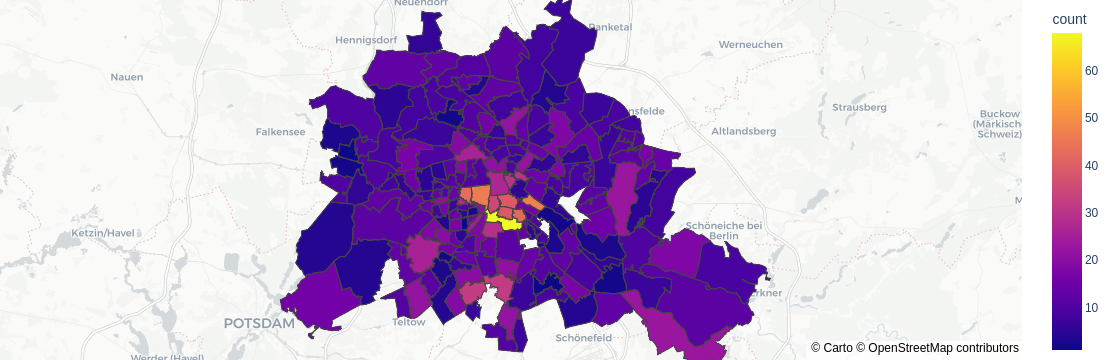

In [188]:
PlotService(analytics).density_plot(start= "01-01-2024", end = "02-02-2024")

/tmp/ipykernel_134821/2877711796.py:27: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



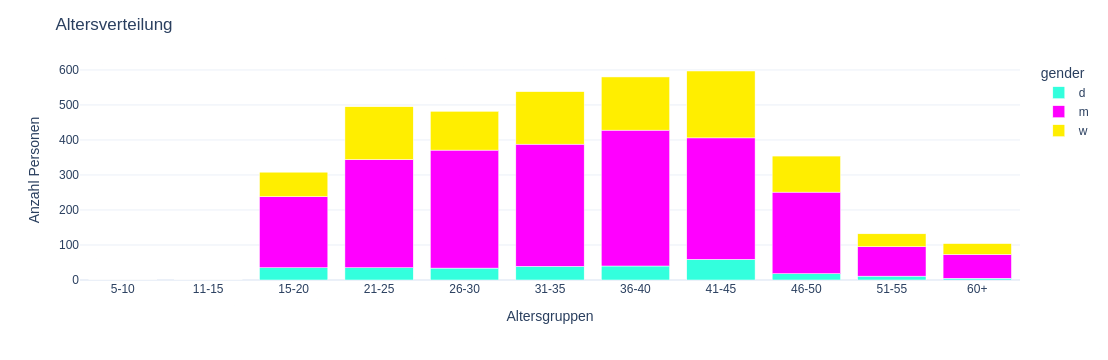

In [189]:
PlotService(analytics).age_histogram(start= "01-01-2024", end = "02-02-2024")

In [272]:
g1 = ["admission", "admission_detail"]
g2 = ["continent","country"]

/tmp/ipykernel_134821/38888887.py:32: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



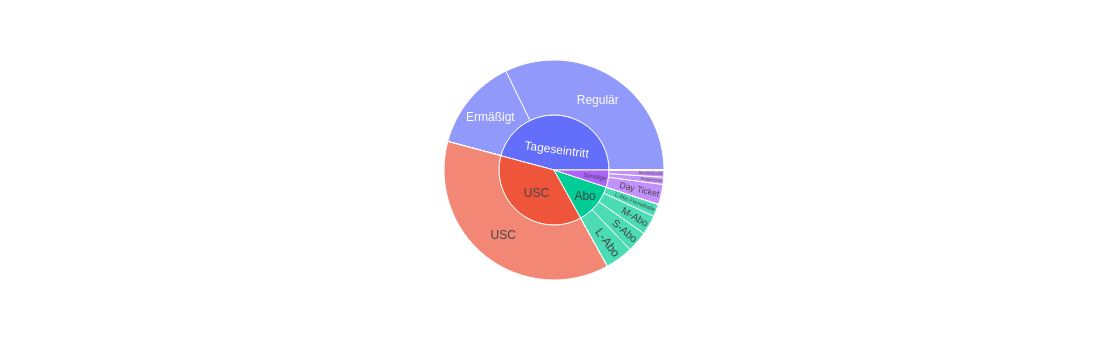

In [307]:
PlotService(analytics).sunburst_plot(g1)

   continent         country  count
0       Asia       Australia      0
1       Asia         Austria      0
2       Asia          Canada      0
3       Asia           China    171
4       Asia  Czech Republic      0
..       ...             ...    ...
83   Oceania           Spain      0
84   Oceania          Sweden      0
85   Oceania     Switzerland      0
86   Oceania             USA      0
87   Oceania  United Kingdom      0

[88 rows x 3 columns]


/tmp/ipykernel_134821/38888887.py:32: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



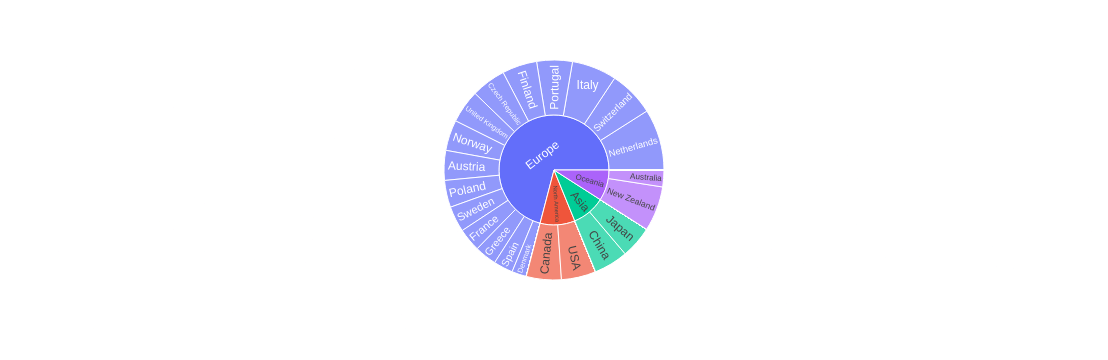

In [285]:
PlotService(analytics).sunburst_plot(g2, country_list= list(country_to_continent.keys()))

/tmp/ipykernel_134821/38888887.py:32: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



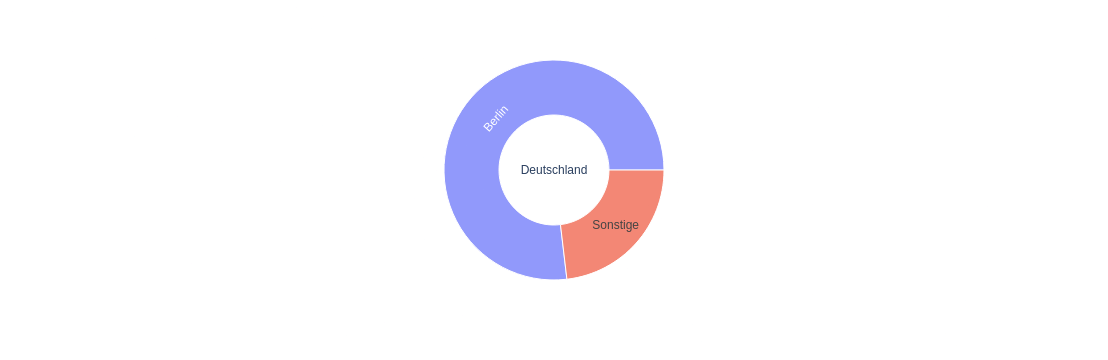

In [353]:
PlotService(analytics).sunburst_plot(["country", "city"], country_list= ["Deutschland"],limit = 1 )

/tmp/ipykernel_134821/38888887.py:32: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



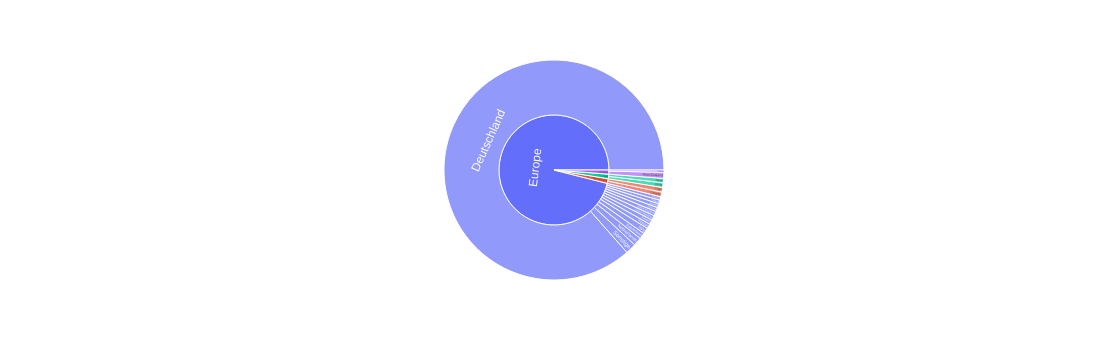

In [360]:
PlotService(analytics).sunburst_plot(["continent", "country"], limit = 0.5)

In [316]:
g3 = ["country", "city"]

In [324]:
df= analytics.proportion(group_list= ["country", "city"], country_list=["Deutschland"])
limit = 0.1
total = df["count"].sum()
df["percent_total"] = df["count"] / total * 100

/tmp/ipykernel_134821/38888887.py:32: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [351]:
df= analytics.proportion(group_list= ["country", "city"], country_list=["Deutschland"])
df = df[df["count"] > 0].copy()
limit = 1
total = df["count"].sum()
df["percent_total"] = df["count"] / total * 100
if limit:
    last_col = g3[-1]

    df[last_col] = df[last_col].astype(str)

    # Kleine Gruppen identifizieren
    small = df["percent_total"] < limit

    if small.any():
        # Neue Kategorie "Sonstige" einfügen
        df.loc[small, last_col] = "Sonstige"
        df = (df.groupby(g3,as_index=False, observed=True).agg({"count": "sum"}))
        total = df["count"].sum()
        df["percent_total"] = df["count"] / total * 100

         country                  city  count  percent_total
809  Deutschland              Augsburg    122       0.558506
814  Deutschland                Berlin  16792      76.872368
816  Deutschland             Bielefeld    107       0.489837
817  Deutschland                Bochum    147       0.672954
818  Deutschland                  Bonn    128       0.585973
820  Deutschland          Braunschweig     86       0.393701
821  Deutschland                Bremen    158       0.723311
825  Deutschland              Chemnitz    150       0.686687
830  Deutschland               Cologne    118       0.540194
832  Deutschland              Dortmund    100       0.457792
833  Deutschland               Dresden    137       0.627175
834  Deutschland              Duisburg     46       0.210584
836  Deutschland            Düsseldorf    150       0.686687
839  Deutschland                Erfurt    195       0.892694
841  Deutschland                 Essen     85       0.389123
844  Deutschland     Fra

/tmp/ipykernel_134821/38888887.py:32: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [346]:
df

count
country     city           
Deutschland Berlin    16792
            Sonstige   5052

In [347]:
df["count"]

country      city    
Deutschland  Berlin      16792
             Sonstige     5052
Name: count, dtype: int64